# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Primero importar la libreria `Pandas` para usar el metodo `.read_csv()`, luego crear un `DataFrame` con los datos obtenidos y almacenarlos con un nombre descriptivo sobre la informacion que contiene y el tipo de dato ejemplo: `products_df`. 
Como en el archivo los valores estan separados por `;` lo mejor será pasar esto al parametro `sep=` en el metodo `read_csv()`. Por último llamar a la funcion `.info()` para cada dataframe para saber los tipos de datos que contienen y la cantidad de valores nulos en cada uno

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# leer conjuntos de datos en los DataFrames
instacart_orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products_df = pd.read_csv('/datasets/products.csv', sep=';')
aisles_df = pd.read_csv('/datasets/aisles.csv', sep=';')
departments_df = pd.read_csv('/datasets/departments.csv', sep=';')
order_products_df = pd.read_csv('/datasets/order_products.csv', sep=';')


In [3]:
# mostrar información del DataFrame
instacart_orders_df.info()
instacart_orders_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
140442,422791,99164,1,4,12,NaN
257934,1919531,191501,32,3,2,7.0
69743,2160607,57158,12,5,16,4.0
440497,3096405,175469,13,5,10,3.0
435855,1454588,1859,32,0,14,4.0


In [4]:
# mostrar información del DataFrame
products_df.info()
products_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# mostrar información del DataFrame
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
departments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
order_products_df.info(show_counts=True)
order_products_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1
4545006,1398151,28733,9.0,0


## Conclusiones

Los datos `days_since_prior_order` en la tabla `instacart_order_df` podria producir errores si se deja como float, ya que los dias transcurridos se cuentan de uno en uno no deberia ser un dato con decimales, al revisar la los datos con `sample()` noté que por el momento no hay valores decimales en esa columna, no deberia alterar el analisis cambiar el tipo de dato. Existe el mismo problema en la tabla `order_products_df` en la columna `add_to_cart_order` es ilogico que los valores sean decimales.
Por último y este creo que es opcional cambiarlo, la columna `reordered` en la misma tabla podria ser booleana ya que solo tiene 2 valores posibles.

Tenemos valores ausentes en las tablas `instacart_order_df`,`products_df ` y `order_products_df`, en el paso siguiente determinaré si debo eliminar las filas completas o solo reemplazar los valores.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

1.- Identificar los datos a los que debo cambiar el tipo de dato. 

2.- Verificar que al cambiar el tipo de dato no altere los resultados del análisis

3.- Utilizar `astype()` para cambiar los datos o `to_number()` dependiendo cual resulte más util

4.- Usando `duplicated().sum()` revisaré si hay valores duplicados en alguna columna, y `value_counts()` para saber cuales son los valores duplicados.

5.- Eliminar los datos duplicados con `drop_duplicates()`

6.- Revisar los DataFrames en busca de valores ausentes con `isna().sum()` y verificar para cada caso si es mejor eliminar la fila o reemplazar el valor por algun otro.

7.- Identificar las columnas con valores nulos y decidir como tratarlos en cada caso, pueden elimonarse las filas en las que se encuentran o reemplazar el valor nulo con un valor que entregue informacion para el análisis


## Encontrar y eliminar los valores duplicados 

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
instacart_orders_df.duplicated().sum()

15

In [9]:
# Mostrar duplicados 
instacart_orders_df['order_id'].value_counts().head(15)

2125197    2
1782114    2
1286742    2
391768     2
1021560    2
2232988    2
408114     2
2282673    2
1919531    2
2160484    2
1918001    2
794638     2
1112182    2
467134     2
2845099    2
Name: order_id, dtype: int64

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? 

Al parecer hay 15 filas duplicadas, la columna que debemos revisar es la de `order_id` porque en las demas columnas es normal que se repitan muchas veces los mismos valores, en este caso son filas completamente duplicadas (los valores se repiten en todas las columnas de la fila).
La columna con datos duplicados contiene datos tipo `int` pero son de caracter cualitativo, ya que representan un `ID`

In [10]:
# Ejemplo fila duplicada 
instacart_orders_df[instacart_orders_df['order_id']==1919531]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
257934,1919531,191501,32,3,2,7.0
323900,1919531,191501,32,3,2,7.0


La linea de codigo anterio la ejecuté con los distintos valores con `order_id` duplicados y los datos concuerdan, son duplicados exactos.

In [11]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos_2_am = instacart_orders_df[(instacart_orders_df['order_hour_of_day']== 2)&(instacart_orders_df['order_dow']==3) ]
print(pedidos_2_am)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

Sugiere que se realizaron varios pedidos a las 2:00 a.m lo que no implica que los datos estén duplicados pero podemos ver que se han realizado exactamente 1004 pedidos a esa hora, es mejor realizar ese tipo de consultas una vez haya eliminado los duplicados para evitar errores, aunque la columna `'order_hour_of_day'` es tipo int también es una columna cualitativa, y podriamos cambiar su tipo de dato a `DateTime` si llega a ser conveniente

In [12]:
# Elimina los pedidos duplicados
instacart_orders_df.drop_duplicates(inplace= True)

In [13]:
# Vuelve a verificar si hay filas duplicadas
instacart_orders_df.duplicated().sum()

0

In [14]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
instacart_orders_df['order_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- Encontré 15 filas duplicadas con el metodo `duplicated()` y `sum()`, para corroborar que fueran duplicados exactos revisé algunos valores al azar de la lista de duplicados que obtuve con `value_counts()` y al confirmar que lo eran los eliminé con el mentodo `drop_duplicates()` con el parametro `inplace = True` para reasignar el valor a la misma variable

### `products` data frame

In [15]:
# Verifica si hay filas totalmente duplicadas
products_df.duplicated().sum()

0

In [16]:
# Revisa únicamente si hay ID de departamentos duplicados
products_df['product_id'].duplicated().sum()

0

In [17]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products_df['product_name'] = products_df['product_name'].str.lower()
products_df['product_name'].duplicated().sum()

1361

In [18]:
# Revisa si hay nombres duplicados de productos no faltantes
products_df[(products_df['product_name'].duplicated()==True)& (~products_df['product_name'].isna())]

,product_id,product_name,aisle_id,department_id
2058,2059,biotin 1000 mcg,47,11
5455,5456,green tea with ginseng and honey,96,20
5558,5559,cream of mushroom soup,69,15
7558,7559,cinnamon rolls with icing,105,13
9037,9038,american cheese slices,21,16
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [19]:
# Corroborar la informacion de las otras columnas 
products_df[products_df['product_name']== 'burrito- steak & cheese']

,product_id,product_name,aisle_id,department_id
44314,44315,burrito- steak & cheese,38,1
49693,49694,burrito- steak & cheese,38,1


In [20]:
# Revisa si hay nombres duplicados de productos faltantes
products_df[(products_df['product_name'].duplicated()==True)& (products_df['product_name'].isna())]

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [21]:
# Eliminar los datos duplicados
products_df.drop_duplicates(subset='product_name', inplace= True)

- En el DataFrame habia varios duplicados implicitos en la columna `product_name`, ya que algunos nombres de producto tenian mayúsculas en ellos, se resolvió con el método `str.lower()`, y de esa forma se detectaron con el metodo `duplicated()`, aún así solo 104 resultaron ser valores duplicados los otros 1258 eran Nulos, al eliminar los valores duplicados con `drop_duplicate()` solo quedó un producto con valor nulo en la tabla `producto_df`.
- Al parecer todos los valores nulos estaban duplicados tambien en las columnas `aisle_id` y `department_id`.

### `departments` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
departments_df.duplicated().sum()

0

In [23]:
# Revisa únicamente si hay IDs duplicadas de productos
departments_df['department_id'].duplicated().sum()

0

In [24]:
# Tampoco hay nombres de departamento duplicado
departments_df['department'].duplicated().sum()

0

Tanto al revisar la tabla completa como las columnas por separado, no se encontraron valores duplicados en este dataframe, no requiere acciones correctivas en este caso.

### `aisles` data frame

In [25]:
# Revisa si hay filas totalmente duplicadas
aisles_df.duplicated().sum()

0

In [26]:
# Revisa únicamente si hay IDs duplicadas de productos
aisles_df['aisle_id'].duplicated().sum()

0

Al igual que en el caso del DF `departments_df` no se encontraron datos duplicados en esta tabla.

### `order_products` data frame

In [27]:
# Revisa si hay filas totalmente duplicadas
order_products_df.duplicated().sum()

0

In [28]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products_df.duplicated(subset= ['order_id', 'product_id']).sum()

#order_products_df['order_id'].value_counts()

0

In [29]:
# Este es una lista con algunos de los productos en la orden 61355
order_products_df[order_products_df['order_id']==61355].sort_values(by='add_to_cart_order').tail(5)

,order_id,product_id,add_to_cart_order,reordered
4026844,61355,48104,NaN,0
4063159,61355,1087,NaN,0
4126014,61355,12440,NaN,0
4164200,61355,9484,NaN,0
4268097,61355,40709,NaN,0


Esta es una tabla intermedia, conecta los `order_id` con los `product_id` ya que existe una relacion M:M (muchos a muchos) entre los dataframes `product_df` y `order_df`es normal que ambos datos aún siendo ID se repitan muchas veces, pero si ambos se repiten al mismo tiempo podria ser un duplicado. En esta tabla no se dio el caso, no hay filas duplicadas.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [30]:
# Encuentra los valores ausentes en la columna 'product_name'
products_df[products_df['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21


- Justo ahora solo existe un valor ausente, porque los demás fueron eliminados como duplicado de este valor, pero ya se revisó anteriormente y, sí coincidian en el con el mismo ID de pasillo y departamento.

In [31]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products_df[(products_df['product_name'].isna()) & (products_df['aisle_id']==100)].count()

product_id       1
product_name     0
aisle_id         1
department_id    1
dtype: int64

- Si todos los productos ausentes están relacionados con el pasillo de ID 100
- Tambien probe ejecutar la linea anterior de codigo sin haber ejecutado antes la linea para eliminar duplicados y los 1258 datos nulos coincidian en el mismo pasillo con ID 100

In [32]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products_df[(products_df['product_name'].isna()) & (products_df['department_id']==21)].count()

product_id       1
product_name     0
aisle_id         1
department_id    1
dtype: int64

- Efectivamente el producto ausente está relacionado con el departamento ID 21
- Tambien probe ejecutar la linea anterior de codigo sin haber ejecutado antes la linea para eliminar duplicados y los 1258 datos nulos coincidian en el mismo departamento con ID 21

In [33]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(aisles_df[aisles_df['aisle_id'] == 100 ],'\n')
print('=========================')
print(departments_df[departments_df['department_id'] == 21])

    aisle_id    aisle
99       100  missing 

    department_id department
20             21    missing


- Tanto el pasillo con ID 100 como el departamento con ID 21 corresponden a la descirpcion de `missing` (Faltante). Ya que estos datos no contienen informacion alguna para los analisis, podriamos eliminarlos por completo sin alterar nuestros resultados.

In [34]:
# Completa los nombres de productos ausentes con 'Unknown'
products_df['product_name']= products_df['product_name'].fillna('Unknown')
products_df['product_name'].isnull().sum()


0

- Al parecer el pasillo ID 100 y el departamento ID 21 son pasillos lugares y productos sobre los que no se tiene informacion, para almecenar esta informacion bastará con tener un unico registro o una sola categoria de producto denominado `Unknown` para todos los productos sin nombre, no necesitamos los 1258 registros que habia almacenado anteriormente. Por lo dicho anteriormente se utilizó el metodo `fillna()` para llenar los datos ausentes con la el nombre 'Unknown' ya que la variable es de tipo string.

### `orders` data frame

In [35]:
# Encuentra los valores ausentes
instacart_orders_df.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

¿Hay algún valor ausente que no sea el primer pedido del cliente?
- No, solo hay valores ausentes en la columna `days_since_prior_order`

### `order_products` data frame

In [36]:
# Encuentra los valores ausentes
order_products_df.isnull().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [37]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
numero_min_carrito = order_products_df['add_to_cart_order'].min()
numero_max_carrito = order_products_df['add_to_cart_order'].max()
print('Los valores minimos y maximos en la columna "add_to_cart_order" son: ', numero_min_carrito,' y ', numero_max_carrito, 'respectivamente')

Los valores minimos y maximos en la columna "add_to_cart_order" son:  1.0  y  64.0 respectivamente


In [38]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
null_carrito_id = order_products_df[order_products_df['add_to_cart_order'].isnull()]['order_id'].sort_values()
print(null_carrito_id)

2437093       9310
3195573      61355
3941595      61355
2968806      61355
3965219      61355
            ...   
3760909    3383594
3784932    3383594
2772397    3383594
1537276    3383594
1038616    3383594
Name: order_id, Length: 836, dtype: int64


In [39]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
count_products = order_products_df.query('order_id in @null_carrito_id')['product_id'].value_counts()
min_productos_pedidos = count_products.min()
max_productos_pedidos = count_products.max()
print('Los pedidos con valores ausentes tienen maximo',max_productos_pedidos, 'productos, y minimo', min_productos_pedidos)

Los pedidos con valores ausentes tienen maximo 25 productos, y minimo 1


- Al parecer los pedidos con valores ausentes tienen distintas cantidades de productos, pero ninguno supera los 25 artículos 

In [40]:
# Remplaza los valores ausentes en la columna 'add_to_cart' con 999 y convierte la columna al tipo entero.
order_products_df['add_to_cart_order'].fillna(999, inplace = True)
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype(int)
order_products_df['add_to_cart_order'].dtype
#print(order_products_df[order_products_df['add_to_cart_order']==999])

dtype('int64')

- Reemplacé los 836 valores ausentes de la columna `add_to_cart_order` por el valor `999` con el metodo `fillna()` y cambié el tipo de dato de la misma columna de `float` a `int` con el metodo `astype(int)`.

## Conclusiones

Preprocesamiento de los datos
- Los valores ausentes ocupaban gran parte de los datos duplicados en la columna `'product_name'` en la tabla `'product_df'` por lo que fue buena idea eliminar los duplicados primero ya que de lo contrario hubiera habido que rellenar 1258 valores nulos con el metodo fillna() solo para ser eliminados posteriormente como duplicados. Aunque, ahora que lo considero, no sé que repercuciones tendrá en la tabla `'order_products_df'` creo que habria que guardar esos ID eliminados de producto y definirlos como 'Unknown' si llegan a aparecer en la tabla en esta tabla.
- Los datos duplicados implicitos podrian causar problemas en el analisis ya que podrian de contarse como dos productos diferentes un mismo producto solo por estar escrito de manera diferente.
- Los datos de la columna `'add_to_cart_order'` son poco relevantes para el análisis ya que no describen de manera precisa cuantos productos estan asociados a cada orden, como se vio anteriormente fue mas efectivo filtrar los datos con valosres ausentes en la columna `'add_to_cart_order'`, obtener su ID y con el metodo `groupby()` agruparlos por `'order_id'` y luego contarlos con el metodo `count()` para determinar la cantidad de productos en cada orden, la columna en este dataframe cumple mas una funcion descriptiva o cualitativa por lo que importa poco su tipo de dato.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [41]:
# Verifica que la hora del dia oscile entre 0 y 23
str_query_hd = 'order_hour_of_day > -1 and order_hour_of_day <= 23'
instacart_orders_df.query(str_query_hd)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [42]:
# Verifica que el día de la semana oscile de 0 a 6
#srt_query_dow = 'order_dow >= 0 and order_dow <= 6'
#instacart_orders_df = instacart_orders_df.query(str_query_hd)

- Todos los datos de la columna order_dow estan dentro del rango de 0 a 6 

In [43]:
# Verifica que el día de la semana oscile de 0 a 6
instacart_orders_df['order_dow'].unique()

array([6, 5, 0, 4, 3, 1, 2])

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

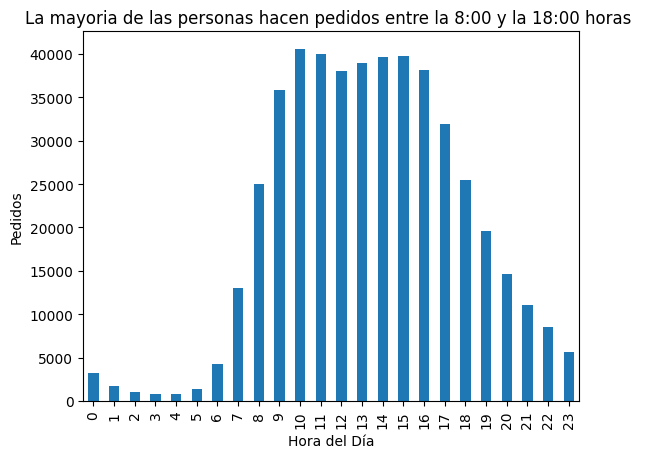

In [44]:
# Agrupar ordenes por la hora en la que se realizan
order_per_hour = instacart_orders_df.groupby('order_hour_of_day')['user_id'].count()
 # Crear gráfico de barras
order_per_hour.plot(kind='bar', 
                    xlabel= 'Hora del Día', 
                    ylabel='Pedidos', title= 'La mayoria de las personas hacen pedidos entre la 8:00 y la 18:00 horas ')
plt.show()
#instacart_orders_df.groupby(['order_hour_of_day','user_id'])['user_id'].count()

- Las horas entre 8:00 a 18:00 son las horas en las que se registran más compras, en cambio entre la 1:00 y las 5:00 de la mañana es cuando menos personas compran.
- A las 7:00 de la mañana y en la noche de 19:00 a las 12 a.m hay una cantidad moderada de personas comprando

### [A3] ¿Qué día de la semana compran víveres las personas?

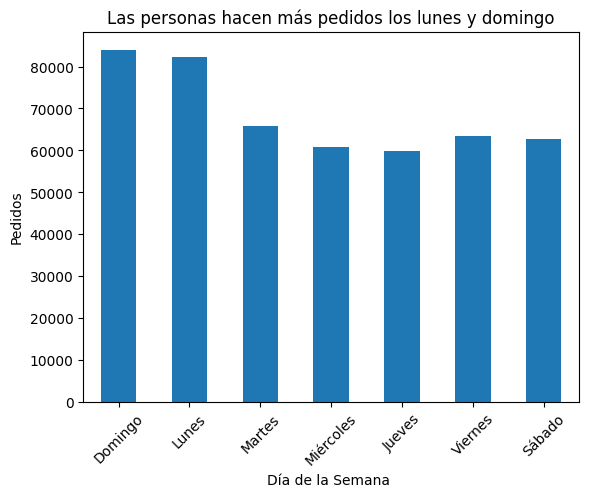

In [45]:
# Agrupar las ordenes por el día en que se realizan y contar el ID de los clientes
dias_de_compra= instacart_orders_df.groupby('order_dow')['user_id'].count()

# Crear grafico de barras
dias_de_compra.plot(kind= 'bar', rot=45,
                    xlabel='Día de la Semana ',
                    ylabel='Pedidos', 
                    title= 'Las personas hacen más pedidos los lunes y domingo')

# Cambiar nombre a los dias de la semana para que sea más claro
dias_semana = ['Domingo','Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']
plt.xticks(ticks=range(7), labels=dias_semana)

# Mostrar gráfico
plt.show()

- Al parecer las personas compran viveres todos los dias de la semana, pero se realizan más compras los días Domingo y Lunes

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

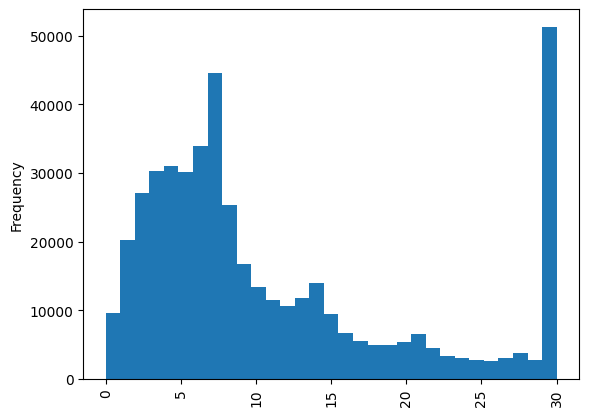

In [46]:
# Definir el tamaño del gráfico
#plt.figure(figsize=(5, 1))
instacart_orders_df['days_since_prior_order'].plot(kind='hist', bins=31, rot = 90)
# Crear un gráfico de caja y bigotes
#sns.boxplot(x=instacart_orders_df['days_since_prior_order'])
#plt.xlabel('Tiempo entre pedidos (días)')
#plt.title('Distribución del Tiempo entre Pedidos')
# Mostrar gráfico
plt.show()

- Las personas esperan entre 0 y 30 días para realizar otro pedido, la mayoria espera entre 5 y 15 días entre un pedido y otro.

- Las personas esperan entre 0 y 30 días para realizar otro pedido, la mayoria espera entre 0 y 10 días entre un pedido y otro. Aunque tabién son muchos los clientes que esperan 30 días entre una compra.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [47]:
# Agrupar los pedidos realizados miercoles y sábado 
mie_sab_df = instacart_orders_df[(instacart_orders_df['order_dow']==6)|(instacart_orders_df['order_dow']==3)]

In [48]:
# Crear tabla dinamica con los las horas en las que se realizan los pedidos los días miercoles y sábado 
mier_sab_df = mie_sab_df.pivot_table(index='order_hour_of_day', 
                          columns = 'order_dow', 
                          values = 'user_id', aggfunc = 'count')

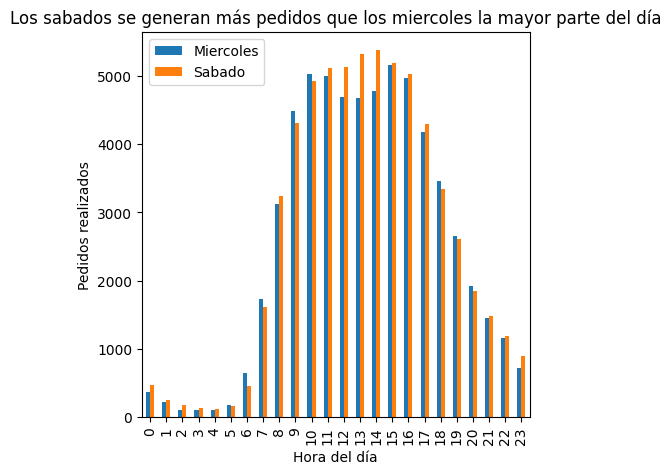

In [49]:
# Crear un gráfico de barras
mier_sab_df.plot(xlabel = 'Hora del día', 
                 title= 'Los sabados se generan más pedidos que los miercoles la mayor parte del día',
                 figsize=[5, 5],
                 y = [3, 6], ylabel= 'Pedidos realizados',
                 kind= 'bar')
plt.legend(['Miercoles', 'Sabado'])

# Mostrar gráfico
plt.show()

- Tanto el miércoles como el sabado suelen aumentar las ventas a partir de las 7:00 y comienza a disminuir gradualmente a parir de las 16:00. 
- Los dias miércoles vende más que los sabados en los siguientes horarios: de 6 a 7, de 9 a 10 y 18 a 20, el sabado genera más pedidos en los demas horarios   

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [50]:
# Contar cantidad de pedidos por cliente
count_order_per_user = instacart_orders_df.groupby('user_id')['order_id'].count().sort_values()

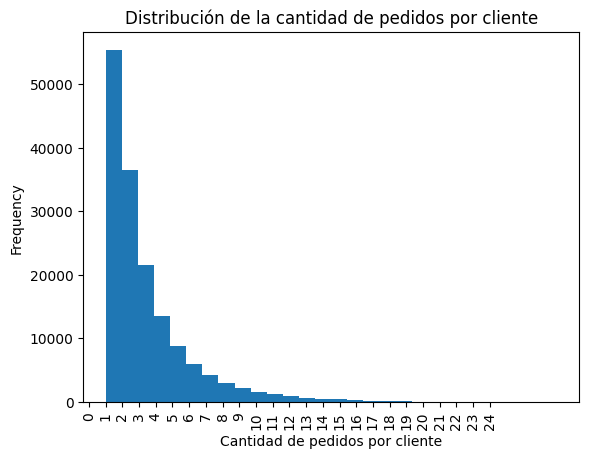

In [51]:
# Crear historiograma de cantidad de pedidos por cliente
count_order_per_user.plot(kind= 'hist', bins = 28, rot= 90)
plt.title('Distribución de la cantidad de pedidos por cliente')
plt.xlabel('Cantidad de pedidos por cliente')
plt.xticks([i for i in range(25)]) 
plt.show()

- La mayor parte de los clientes ha realizado solo uno o dos pedidos. 
- Es poco frecuente que un cliente haga más de 10 pedidos y ninguno supera las 23 ordenes

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [52]:
# Seleccionar las columnas con informacion util de la tabla producto
products_name =  products_df[['product_id','product_name']]
# Unir el DF products con el DF de order_products
products = products_name.merge(order_products_df, on='product_id', how='right')

In [53]:
# Contar los la cantidad de veces que se repite cada producto con su id y nombre
product_counts = products[['product_id','product_name']].value_counts().reset_index()
# Crear un nuevo df para mostrar mejor la informacion 
product_counts.columns=['product_id','product_name','count']
top_20_order_products= product_counts.head(20)
top_20_order_products

,product_id,product_name,count
0,24852,banana,66050
1,13176,bag of organic bananas,53297
2,21137,organic strawberries,37039
3,21903,organic baby spinach,33971
4,47209,organic hass avocado,29773
5,47766,organic avocado,24689
6,47626,large lemon,21495
7,16797,strawberries,20018
8,26209,limes,19690
9,27845,organic whole milk,19600


<Figure size 500x500 with 0 Axes>

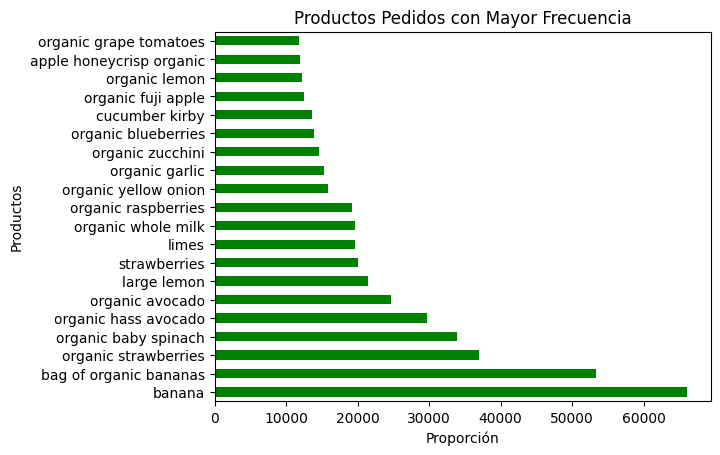

In [54]:
# Crear gráfico de barras
plt.figure(figsize=[5,5])
top_20_order_products.plot(kind='barh' , color= 'green', y= 'count', x= 'product_name', legend=False)
plt.ylabel('Productos')
plt.xlabel('Proporción')
plt.title('Productos Pedidos con Mayor Frecuencia')
plt.show()

- Las bananas son el producto más consumido por mucho, está en los dos primeros lugares con 66050 compras la banana generica, y otras 53297 de la banana organica.
- Las personas  que ordenan en esta app consumen comida muy saludable y vegetariana por los que se ve en el top 20
- Existe una diferencia de más de 50000 pedidos entre el primer producto más pedido y el último y eso considerando solo los 20 mas populares

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [55]:
# Agrupar las ordenes de productos por order_id y contar cuantos productos hay en cada orden
products_per_order = order_products_df.groupby('order_id')['product_id'].count()

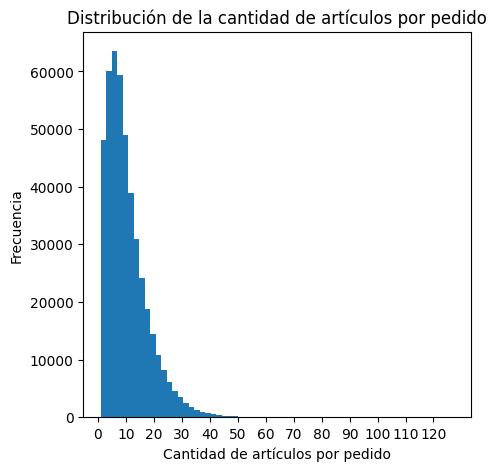

In [56]:
# Crear historiograma
plt.figure(figsize=[5,5])
products_per_order.plot(kind='hist', bins=64)
plt.xticks(range(0, max(products_per_order), 10))
plt.xlabel('Cantidad de artículos por pedido')
plt.ylabel('Frecuencia')
plt.title('Distribución de la cantidad de artículos por pedido')
plt.show()

- Normalmente las personas compran entre 1 y 10 articulos por pedido. Las compras de 10 a 20 articulos tambien son frecuentes, y son menos frecuentes los pedidos con más de 20 productos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [57]:
# Revisar que los productos hayan sido reordenados
reordenado = order_products_df[order_products_df['reordered']==1]
# Unir las tablas products y order_products para saber a que producto pertenece cada ID
reordenado = products_name.merge(reordenado, on='product_id', how='right')

In [58]:
# Contar las veces que se ordena cada producto
###reorder_counts = reordenado.groupby('product_id')['product_name'].count().reset_index(name='count')
###reorder_counts['count'].sort_values(ascending=False).head(20)# no retorna el product_name
reorder_counts = reordenado[['product_id','product_name']].value_counts().reset_index()
reorder_counts.columns= ['product_id','product_name', 'count']
top_20_reorder= reorder_counts.head(20)
top_20_reorder

,product_id,product_name,count
0,24852,banana,55763
1,13176,bag of organic bananas,44450
2,21137,organic strawberries,28639
3,21903,organic baby spinach,26233
4,47209,organic hass avocado,23629
5,47766,organic avocado,18743
6,27845,organic whole milk,16251
7,47626,large lemon,15044
8,27966,organic raspberries,14748
9,16797,strawberries,13945


<Figure size 500x500 with 0 Axes>

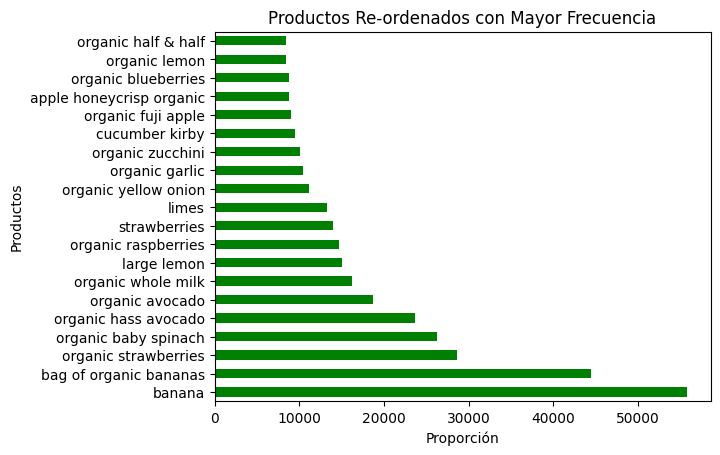

In [59]:
plt.figure(figsize=[5,5])
top_20_reorder.plot(kind='barh' , color= 'green', y= 'count', x= 'product_name', legend = False)
plt.ylabel('Productos')
plt.xlabel('Proporción')
plt.title('Productos Re-ordenados con Mayor Frecuencia')

plt.show()

- Vuelven a aparecer los mismos productos que en la lista en la consulta enterior, al parecer la mayoria de las ventas de estos productos se debe a que las personas las piden han ordenado en más de una ocación, aunque desaparecieron algunos productos y aparecieron otros nuevos, lo que significa que algunos de los productos mas ordenados no son reordenados

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [60]:
# Unir los df de `product_counts` y  `reorder_counts` con el metodo 'merge()' 
count_both = product_counts.merge(reorder_counts, 
                                  on = ['product_id','product_name'], 
                                  how='left' , 
                                  suffixes= ['_order','_reorder'])
count_both.set_index('product_id', inplace= True)

In [61]:
#Calcular la proporción de productos pedidos
count_both['proporcion_order'] = (count_both['count_order'] - count_both['count_reorder']) / count_both['count_order']
#Calcular la proporción de las veces que se vuelve a pedir
count_both['proporcion_reorder'] = count_both['count_reorder'] / count_both['count_order']
count_both


,product_name,count_order,count_reorder,proporcion_order,proporcion_reorder
product_id,,,,,
24852,banana,66050,55763.0,0.155746,0.844254
13176,bag of organic bananas,53297,44450.0,0.165994,0.834006
21137,organic strawberries,37039,28639.0,0.226788,0.773212
21903,organic baby spinach,33971,26233.0,0.227783,0.772217
47209,organic hass avocado,29773,23629.0,0.206361,0.793639
...,...,...,...,...,...
39313,organic whipped honey pure & raw,1,NaN,NaN,NaN
12027,herb and spices havarti,1,1.0,0.000000,1.000000
39306,mango tea,1,NaN,NaN,NaN


- Los pedidos en la categoria reorder conforman casi el 80% del total de pedidos de esos productos, auque por el producto 'herb and spices havarti' creo que puede haber productos mal ingresados ya que si hay solo una orden de ese producto no es posible que haya sido reordenado, está en la categoria incorrecta

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [62]:
# Unir el DF instacart_orders_df por el order_id con order_products_df
client_products = instacart_orders_df.merge(order_products_df, on = 'order_id', how= 'left')

In [63]:
# verificar los product_id en los que reordered = 1
reodered_products = client_products[client_products['reordered']==1]

In [64]:
# agrupar las ordenes de los clientes por user_id y contar los productos_reordenados
reodered_propotion = reodered_products.groupby('user_id')['product_id'].count().sort_values(ascending= False)
# agrupar las ordenes de los clientes por user_id y contar los productos_totales
total_products_per_client = client_products.groupby('user_id')['product_id'].count().sort_values(ascending= False)
# calcular proporcion de productos ya pedidos
proporcion_reorder_per_client = reodered_propotion/total_products_per_client
proporcion_reorder_client = proporcion_reorder_per_client.reset_index()
proporcion_reorder_client.columns=['user_id', 'proporcion_products_reorder']
#proporcion_reorder_client['proporcion_products_reorder'].min()
proporcion_reorder_client.sample(5)

,user_id,proporcion_products_reorder
130813,171440,0.285714
77064,100958,0.441860
133207,174631,0.500000
25936,34038,0.640000
40102,52642,0.750000


- La proporcion de pedidos reordenados versus el total de productos ordenados, varia mucho por cada cliente y pueden ir desde 0.014 hasta 1.0 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
# Unir el DF order_products_df con el products_df con product_id
client_products = client_products.merge(products_name, on = 'product_id', how = 'left')

In [ ]:
# Filtrar los productos que han sido agregados primero al carrito
first_products_to_cart = client_products[client_products['add_to_cart_order']==1]
# Agrupar por nombre de producto y guardar en la variable
first_products_to_cart = first_products_to_cart['product_name'].value_counts()

In [ ]:
first_products_to_cart.head(20)

- Muchos de los productos que las personas agrega primero al carrito son tambien los productos más vendidos y más veces reordenados

### Conclusion general del proyecto:

- Para este proyecto se recibió mucha informacion de parte del cliente, muchas veces no se está seguro de que datos podrian ser relevante o cuales no, por ejemplo, durante todo el analisis no se requiso la informacion las tablas `aisle_df` o `department_df` pero son importantes para mantener la base de datos del cliente organizada y clara.
- Es importante despejar o limpliar los datos de las tablas que se van a analizar antes de procesar los datos para no generar errores en el análisis. 
- En algunos casos no afecta mucho el tipo de dato de una columna, y durante el analisis podria determinarse mejor si conviene más cambiar el tipo de dato, o en el formato original no genera problema.
- Las herramientas que me resultan más utiles y fáciles de usar durante el procesamiento de datos fueron las `merge` y los distintos tipos de filtrado de datos
- Uno de los desafíos más dificiles del proyecto fue entender bien que datos se requerian para responder las preguntas de forma adecuada, y más dificil e importante aún interpretar correctamente la pregunta misma que se planteaba.
- Creo que aun me queda mucho por aprender, sobre todo en cuanto a que tipo de grafico se requiere para cada ocasión.
- ChatGPT es de gran ayuda para depurar el proyecto cuando hay problemas de sintaxis o de cualquier tipo